### Estimador de mínimos cuadrados y ecuaciones normales

Implemente una función que dado un vector $Y$ de valores de respuesta y una matriz $X$ de
valores observados, **mediante las ecuaciones normales**, calcule el **estimador de cuadrados mínimos** $\hat\beta$.

Las ecuaciones normales que nos permiten hallar el estimador de mínimos cuadrados (EMC) para los coficientes $\beta$ son: 

$\hat\beta = (X^{T}X)^{-1}X^{T}Y$

**Llamamos:**
* X = matriz de valores observados
* Y = valores de respuesta

La función que creamos es entonces la siguiente:

In [1]:
beta <- function(X, Y) {
    X <- model.matrix(~X)
   beta = solve(t(X) %*%X) %*% t(X) %*% Y
}

Y la probaremos con el data set cars:

In [2]:
X<-cars$speed
Y<-cars$dist

In [3]:
print(beta(X,Y))

                  [,1]
(Intercept) -17.579095
X             3.932409


In [2]:
print(lm(data = cars, dist~speed))


Call:
lm(formula = dist ~ speed, data = cars)

Coefficients:
(Intercept)        speed  
    -17.579        3.932  



Comprobamos que la función nos muestra las estimaciones correctas para los $\beta$

### Ejercicio 10 - Diagrama de dispersión y recta de regresión

Se tiene en el archivo girasol.txt el rinde de diversas parcelas de girasol (en toneladas) según la cantidad de dinero invertida en fertilizantes (en miles de pesos).

**a.** Graficar en un **diagrama de dispersión** inversión vs rinde.

**b.** Plantear un modelo de regresión lineal simple y obtener el **estimador de mínimos cuadrados**.

**c.** Graficar la **recta de regresión** obtenida, ¿detecta algo sospechoso?

**a. Graficar en un diagrama de dispersión inversión vs rinde.**

In [8]:
datos_girasol <- read.table(file = "girasol.txt", sep=" ", header = T)

In [9]:
head(datos_girasol)

,inversion,rinde
,<dbl>,<dbl>
1,152.53730,474.3608
2,180.93557,437.4576
3,153.51759,460.3179
4,67.39041,305.2151
5,79.25137,224.3560
6,119.18013,410.0063


In [13]:
inversion <- datos_girasol$inversion

In [14]:
rinde <- datos_girasol$rinde

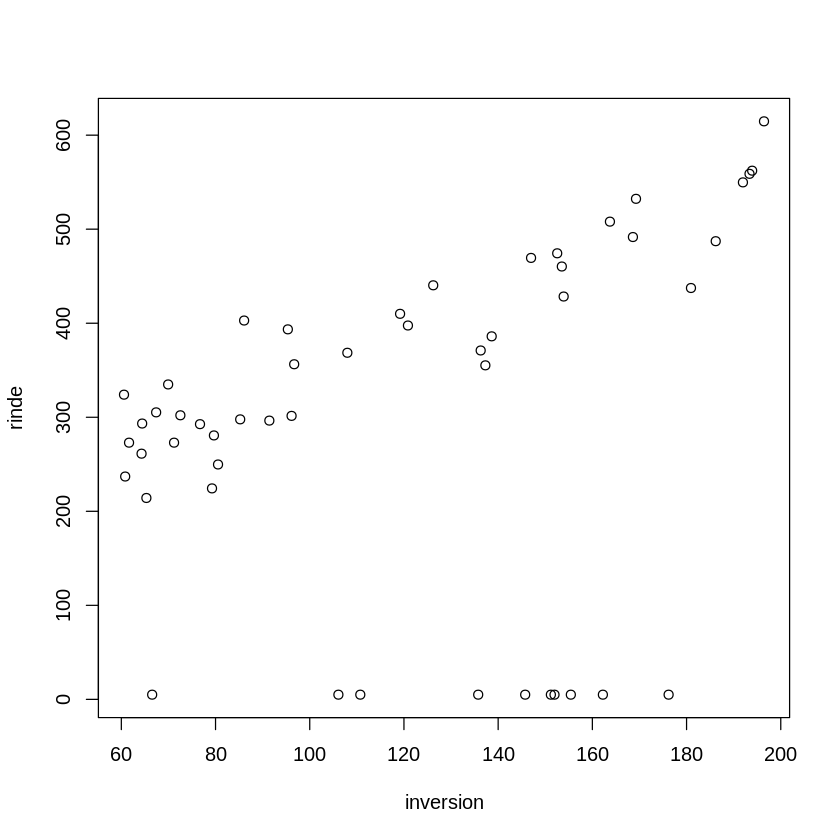

In [15]:
plot(inversion, rinde)
p<-recordPlot()

**b. Plantear un modelo de regresión lineal simple y obtener el estimador de mínimos cuadrados.**

In [96]:
modelo = lm(rinde ~ inversion)
summary(modelo)


Call:
lm(formula = rinde ~ inversion)

Residuals:
    Min      1Q  Median      3Q     Max 
-368.43   -3.88   55.95  112.52  216.51 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 158.0532    71.4879   2.211   0.0318 *
inversion     1.2224     0.5578   2.191   0.0333 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 172.1 on 48 degrees of freedom
Multiple R-squared:  0.09095,	Adjusted R-squared:  0.07201 
F-statistic: 4.802 on 1 and 48 DF,  p-value: 0.03331


Podemos ver que el **modelo lineal** resulta: **estimacion_rinde** = 158.0532 + 1.224 * **inversion** 

**c. Graficar la recta de regresión obtenida, ¿detecta algo sospechoso?**

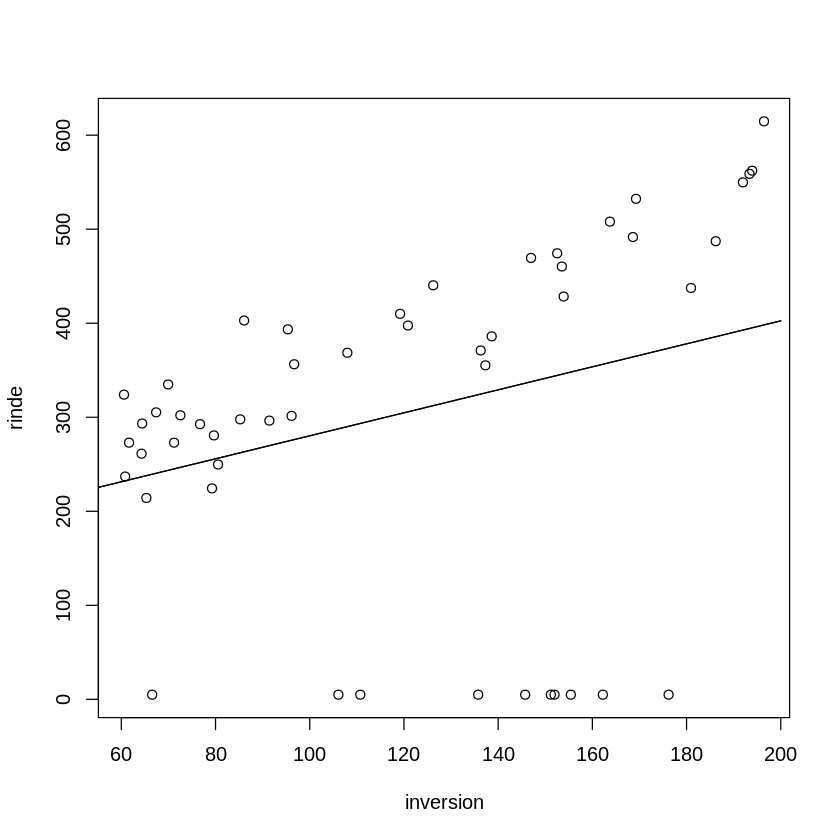

In [106]:
t <- seq(0,200,1)
recta<-158.0532 + 1.2224 * t
replayPlot(p)
points(t,recta, type = "l", ylim = c(0,600))
lines(t,recta, type = "l", ylim = c(0,600))

Se observa que el modelo no es muy útil si se consideran los casos extremos en los que ocurrieron mucha inversion y a pesar de eso el rinde fue mínimo. Estos datos son outliers que no son representativos de los casos más comunes y por lo tanto al utilizarlos para crear el modelo, la recta de regresión no es buena.